In [148]:
import pandas as pd
import numpy as np
from scipy import stats
 
# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams['figure.dpi'] = 100

In [105]:
df = pd.read_csv('Company_Data.csv')

In [106]:
df.shape

(400, 11)

In [107]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [108]:
df.shape

(400, 11)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [110]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [111]:
df.describe(include='object').T

,count,unique,top,freq
ShelveLoc,400,3,Medium,219
Urban,400,2,Yes,282
US,400,2,Yes,258


In [112]:
df.count()

Sales          400
CompPrice      400
Income         400
Advertising    400
Population     400
Price          400
ShelveLoc      400
Age            400
Education      400
Urban          400
US             400
dtype: int64

# Null Values Count

In [113]:
df.isnull().sum()/len(df)

Sales          0.0
CompPrice      0.0
Income         0.0
Advertising    0.0
Population     0.0
Price          0.0
ShelveLoc      0.0
Age            0.0
Education      0.0
Urban          0.0
US             0.0
dtype: float64

# Valuse count distribution acreoss category

In [114]:
df["ShelveLoc"].value_counts(normalize=True)

Medium    0.5475
Bad       0.2400
Good      0.2125
Name: ShelveLoc, dtype: float64

In [115]:
df["Urban"].value_counts(normalize=True)

Yes    0.705
No     0.295
Name: Urban, dtype: float64

In [116]:
df["US"].value_counts(normalize=True)

Yes    0.645
No     0.355
Name: US, dtype: float64

# Try to put all columns to 50 bins and check distributions with each category

array([[<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'CompPrice'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Advertising'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>, <AxesSubplot:>]],
      dtype=object)

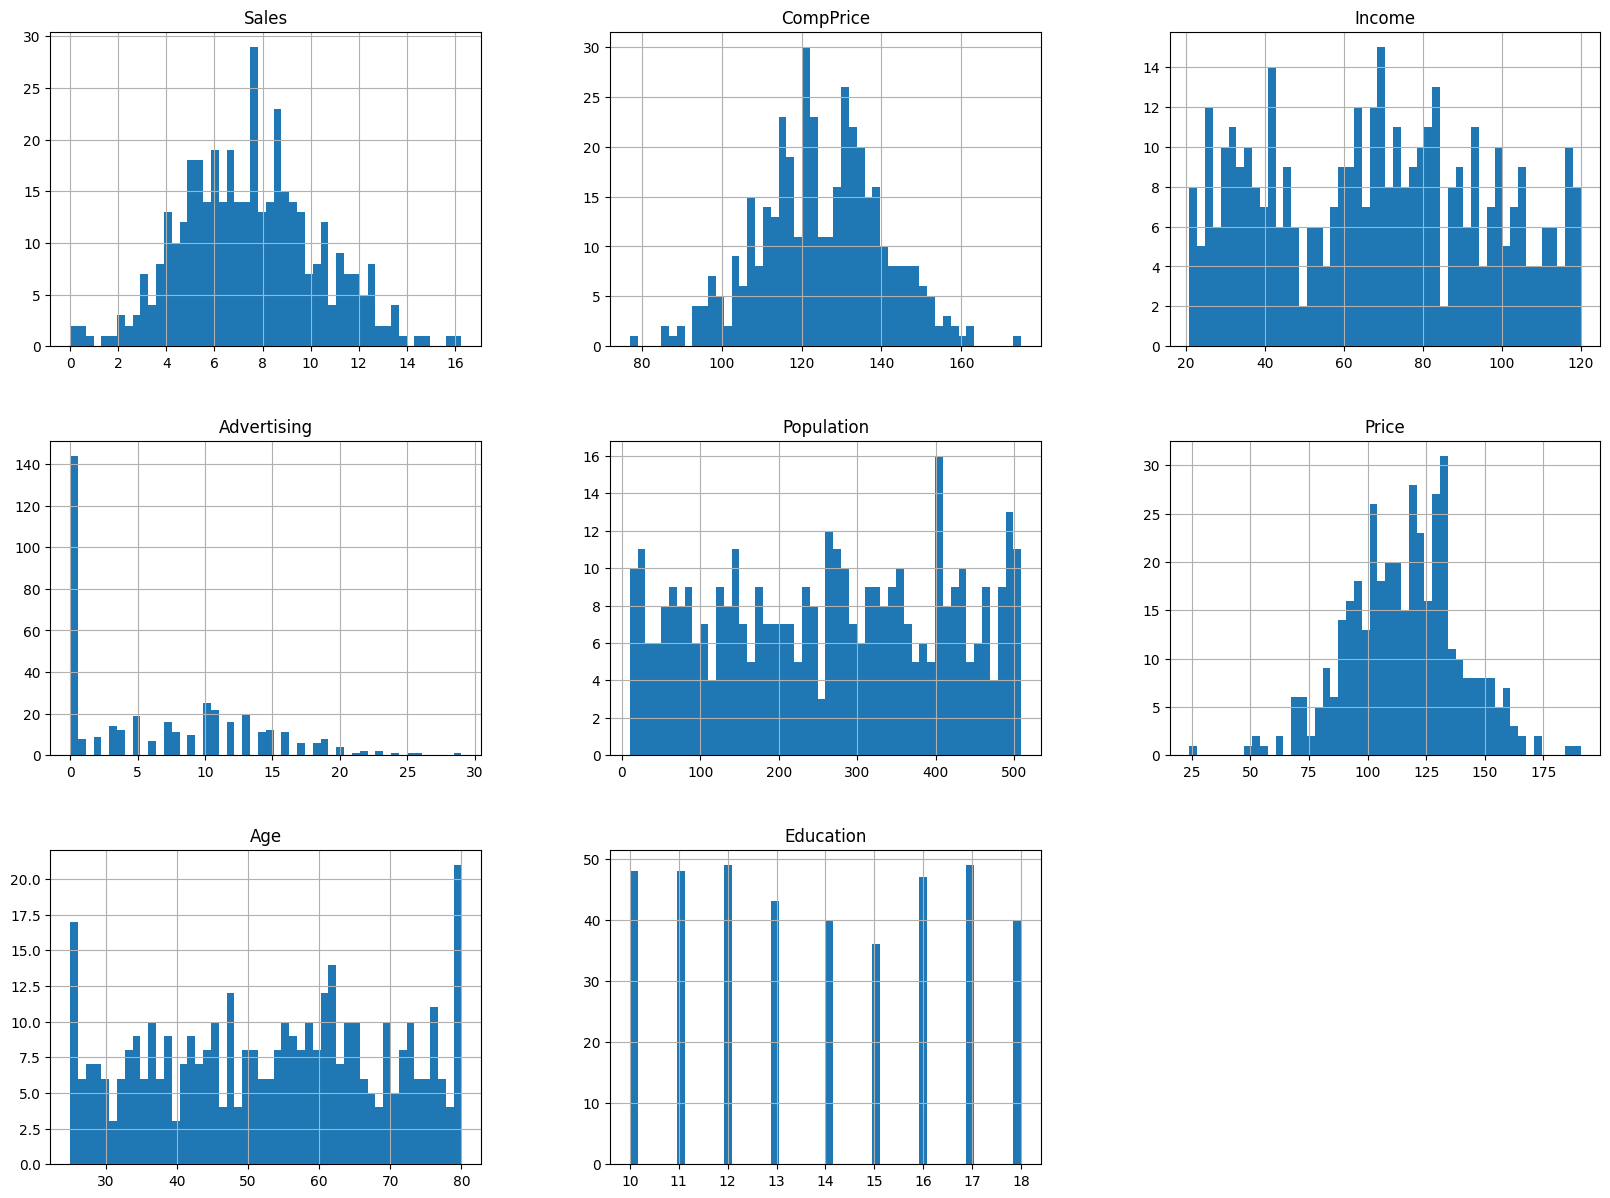

In [117]:
df.hist(bins=50, figsize=(20,15))

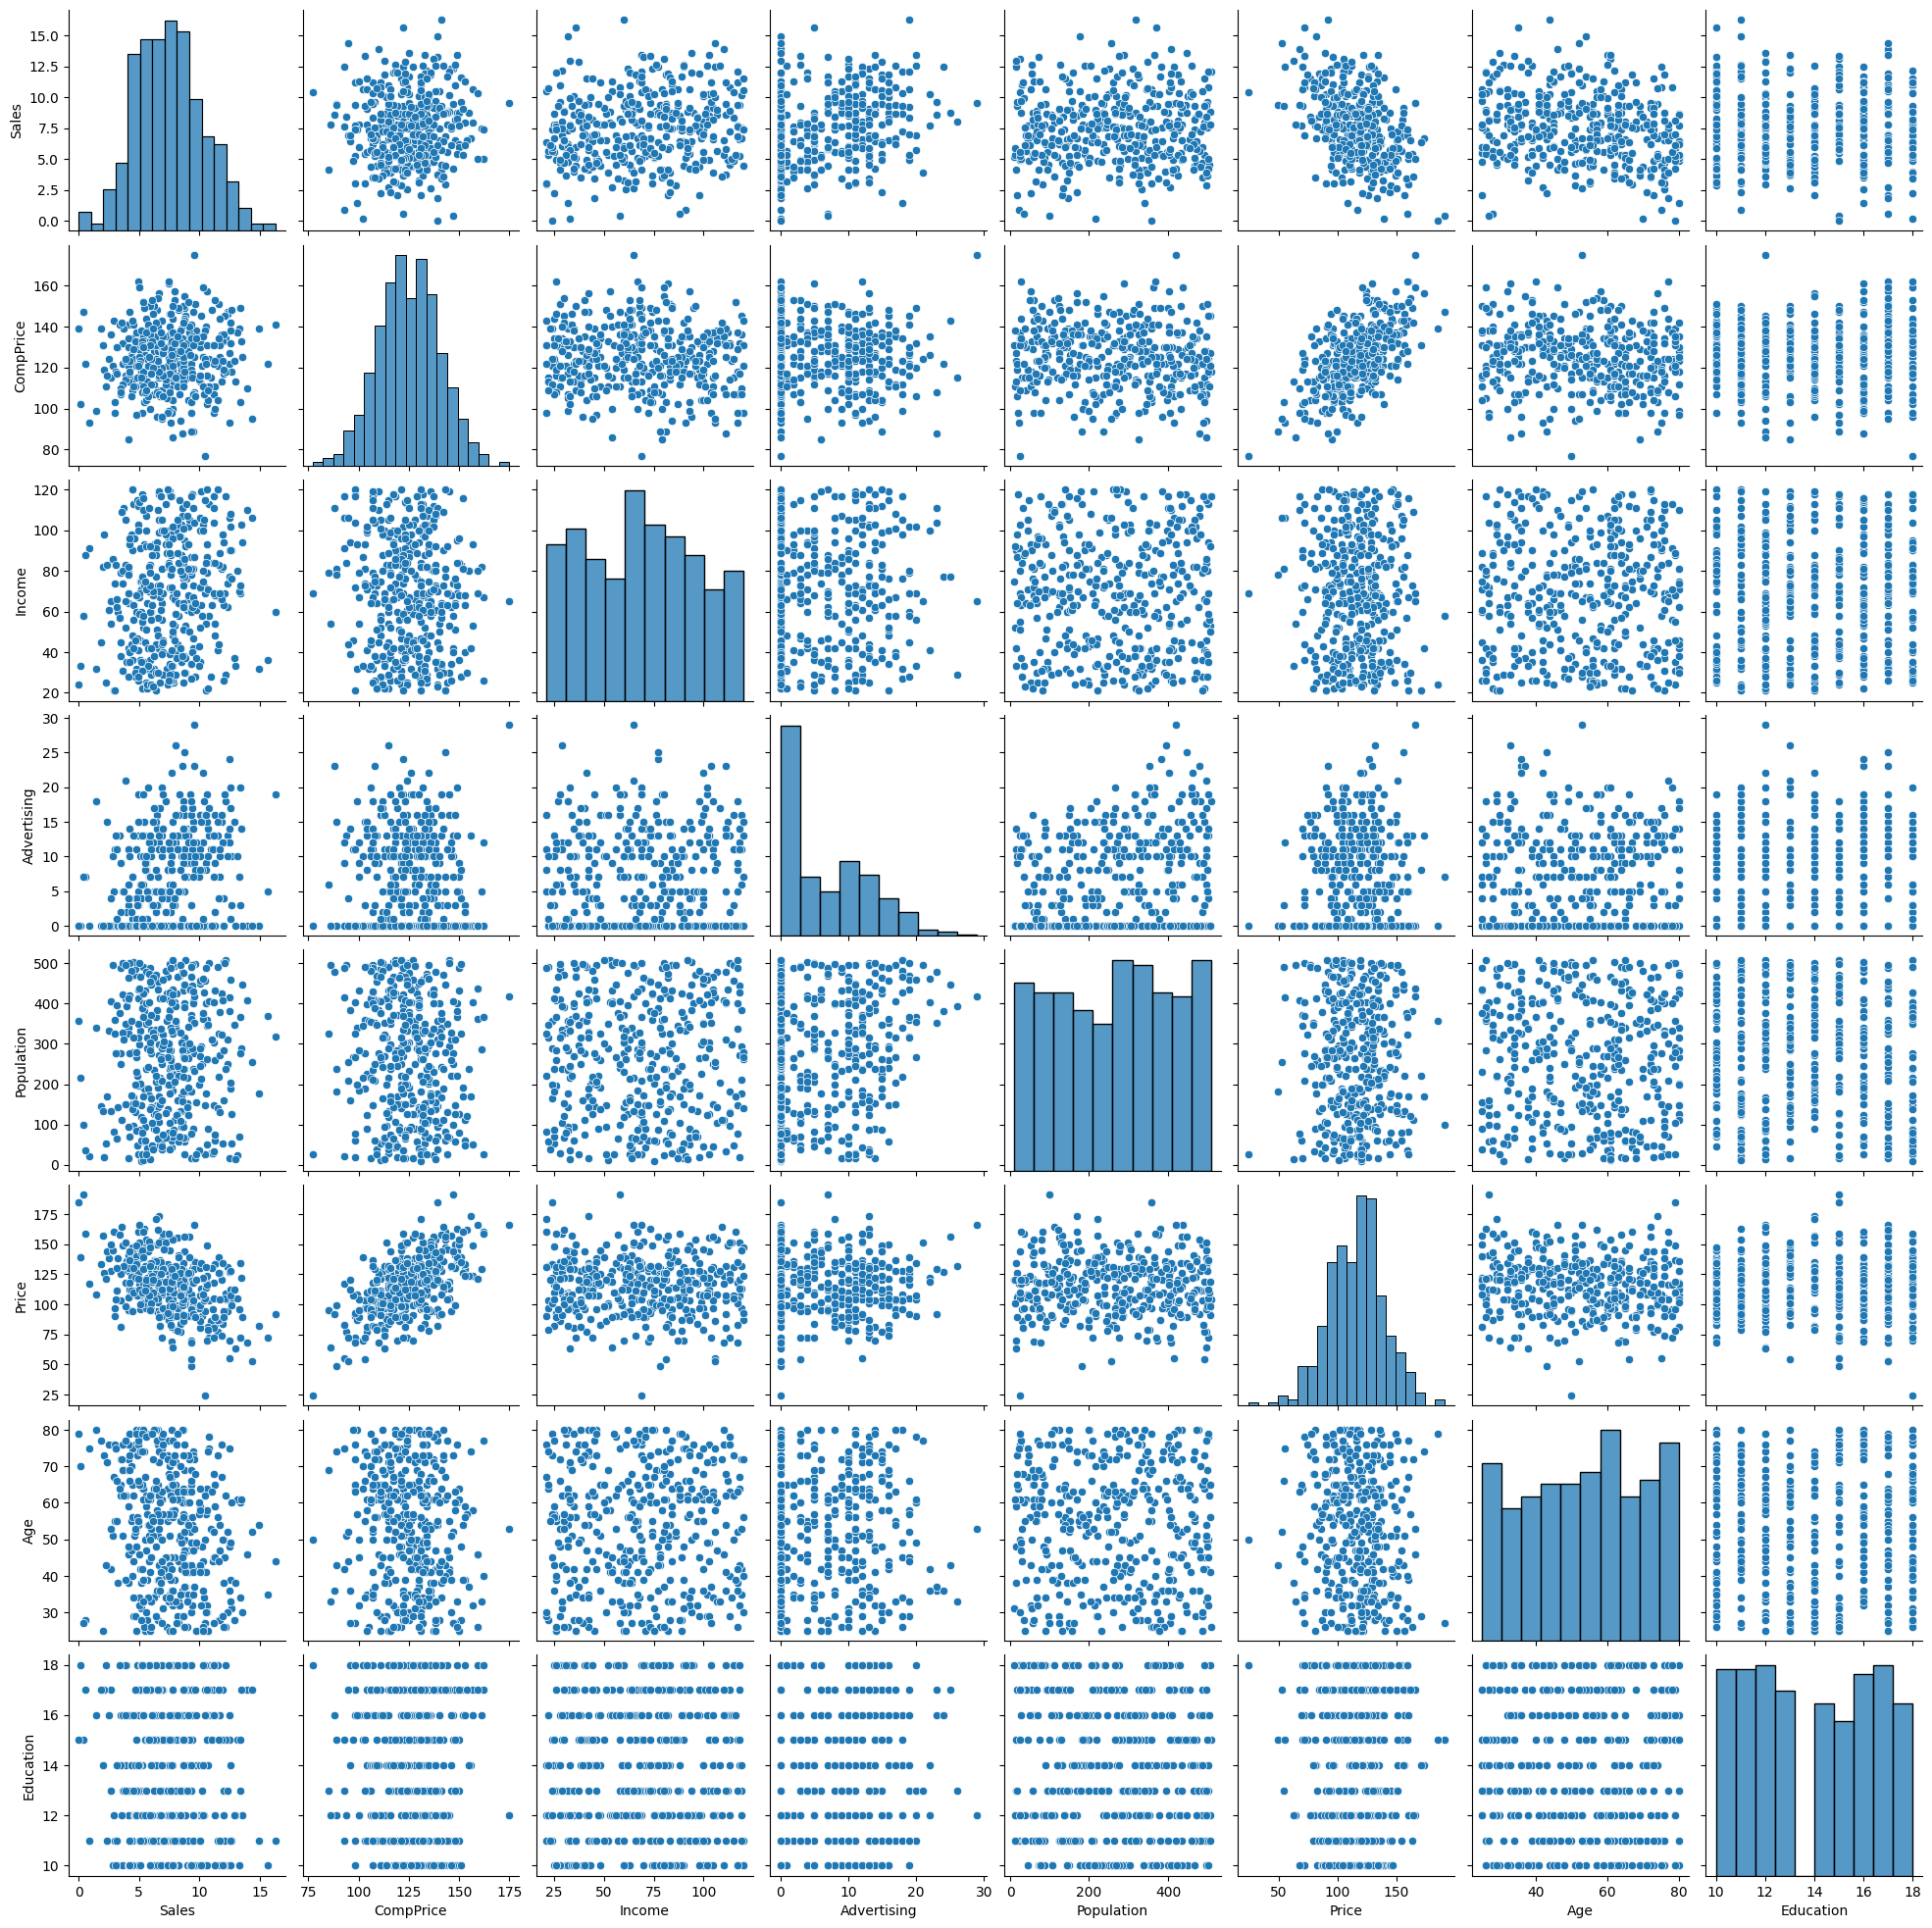

In [132]:
sns.pairplot(df)

# Distplot Sales vs each categorical values

Lambda value used for Transformation: 0.7516977616214907


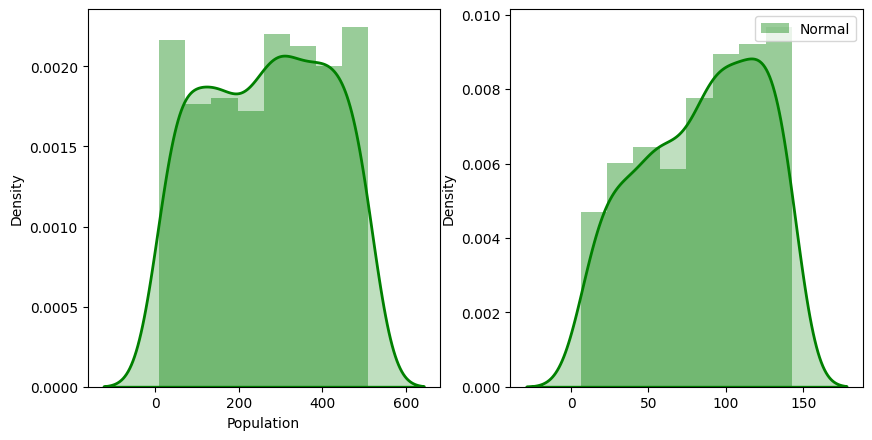

In [162]:
# generate non-normal data (exponential)
original_data = df['Population']
 
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(original_data)
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(original_data, hist = True, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = True, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

Lambda value used for Transformation: 0.7070309482920648


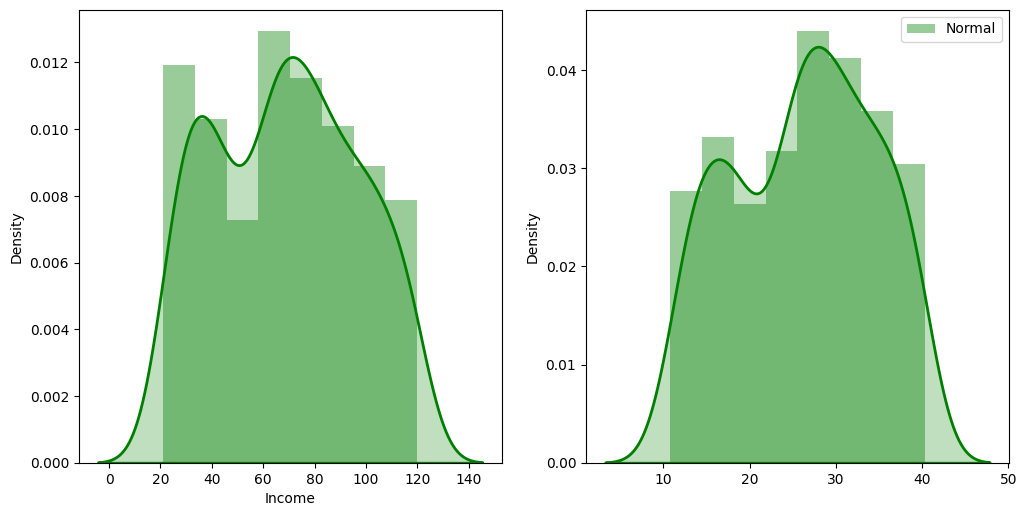

In [150]:
# generate non-normal data (exponential)
original_data = df['Income']
 
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(original_data)
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2, figsize=(12,6))

# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(original_data, hist = True, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
ax[0].set_label("Non-Normal")
 
sns.distplot(fitted_data, hist = True, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
# fig.set_figheight(5)
# fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

Lambda value used for Transformation: 0.9037158323592513


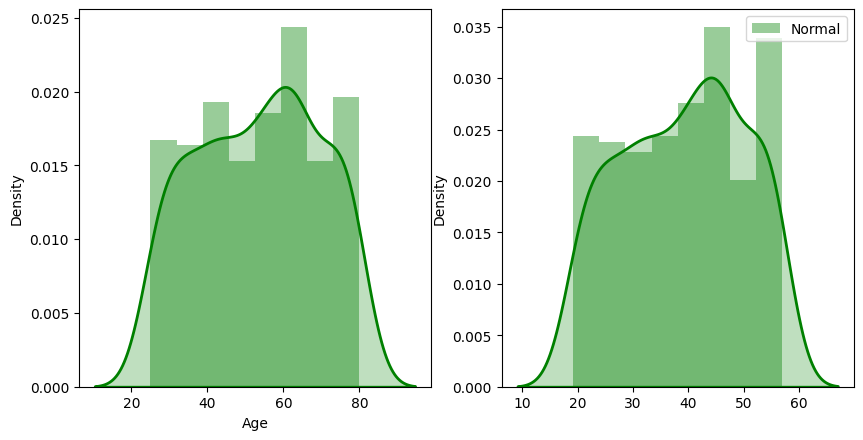

In [151]:
# generate non-normal data (exponential)
original_data = df['Age']
 
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(original_data)
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(original_data, hist = True, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = True, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

Transform is not required in Data becouse distribution across category is same.

# Boxplot Sales vs each categorical values
Box plots are used to display the distribution of numerical data and show the median, quartiles, and any outliers in the data set.

<AxesSubplot:xlabel='ShelveLoc', ylabel='Sales'>

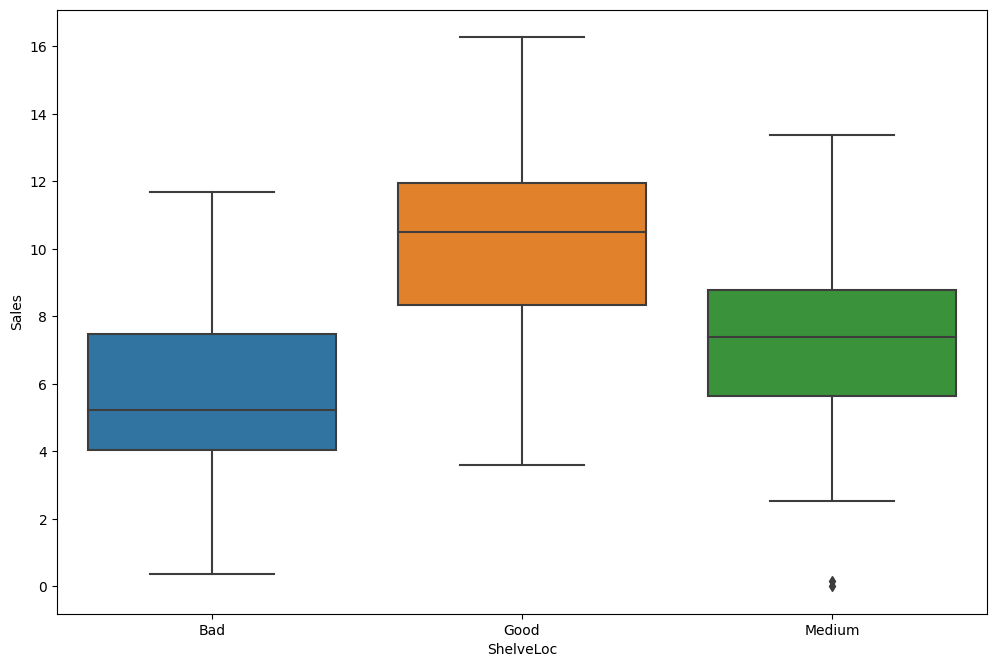

In [152]:
sns.boxplot(data=df, x='ShelveLoc', y='Sales')

#### How ShelveLoc category is related with Sales try to visualise boxplot

<AxesSubplot:xlabel='Urban', ylabel='Sales'>

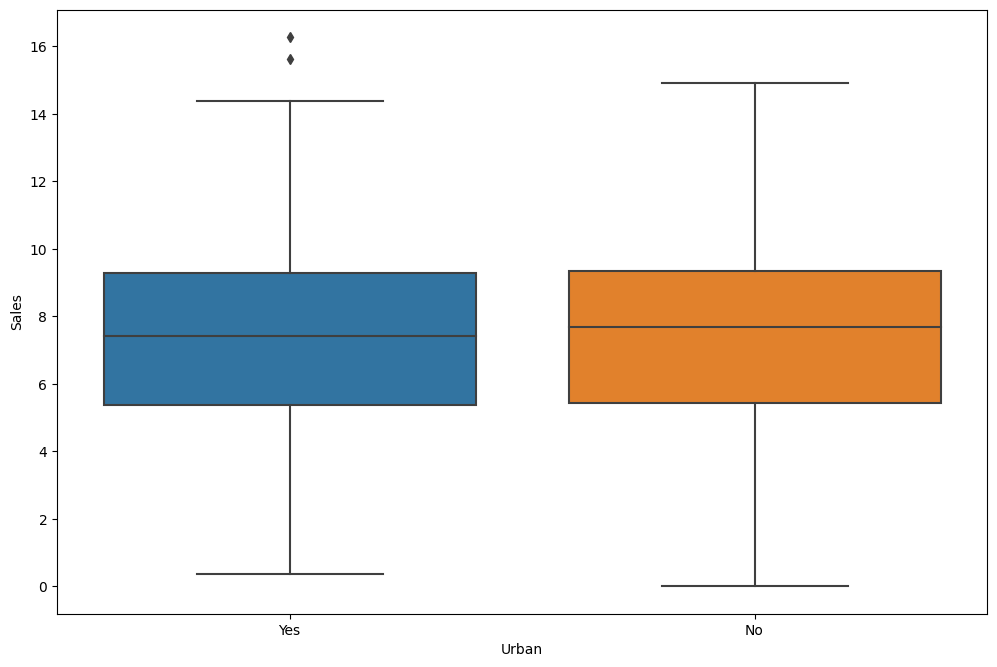

In [153]:
sns.boxplot(data=df, x='Urban', y='Sales')

#### How Urban category is related with Sales try to visualise boxplot

<AxesSubplot:xlabel='US', ylabel='Sales'>

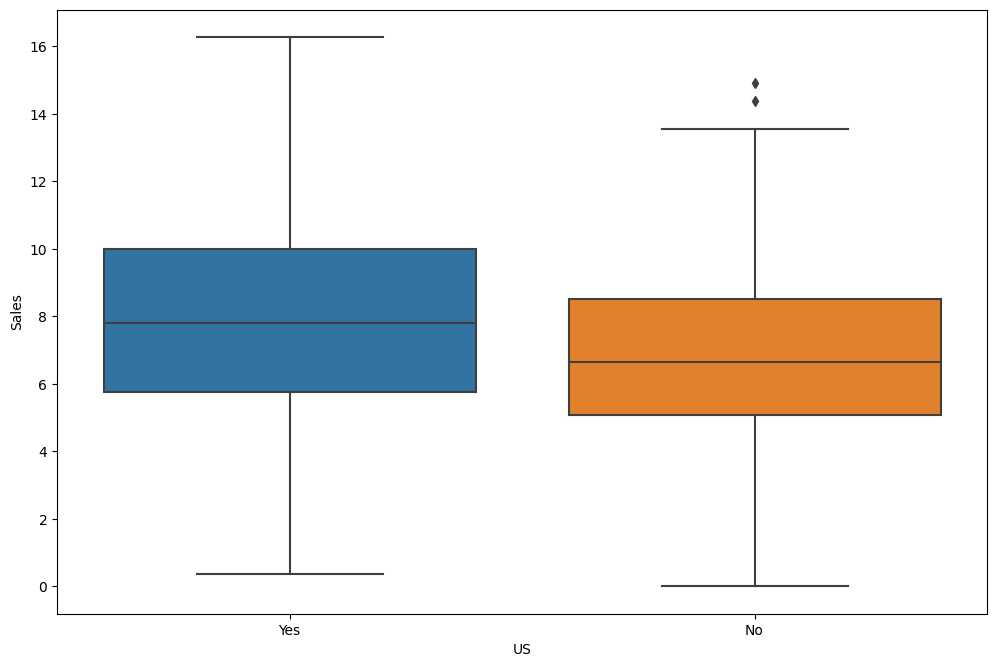

In [154]:
sns.boxplot(data=df, x='US', y='Sales')

<AxesSubplot:>

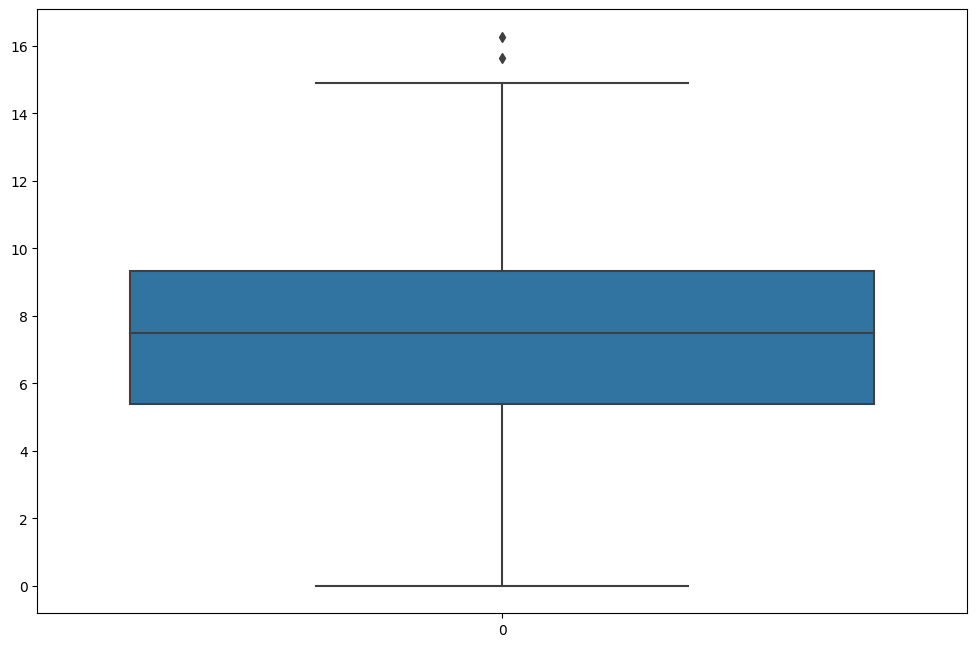

In [155]:
sns.boxplot(data=df.Sales)

# Histplot of Age vs Categorical Values

<AxesSubplot:xlabel='Age', ylabel='Count'>

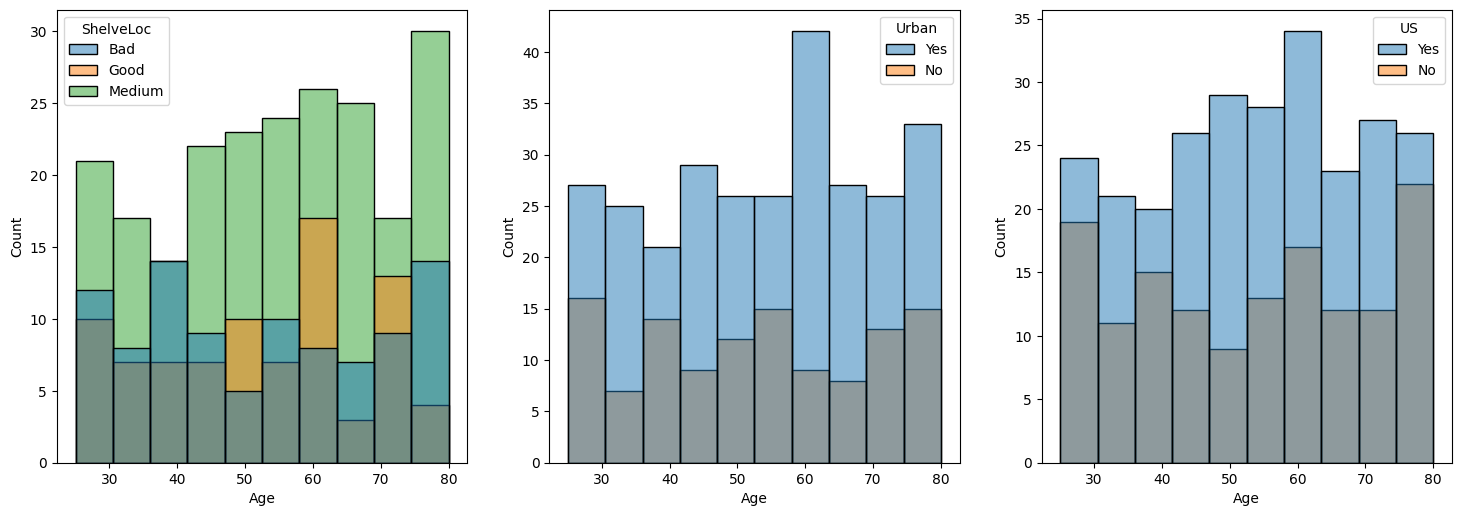

In [156]:
fig, ax = plt.subplots(1,3, figsize=(18,6))
sns.histplot(data=df, x='Age', hue='ShelveLoc',ax=ax[0])
sns.histplot(data=df, x='Age', hue='Urban',ax=ax[1])
sns.histplot(data=df, x='Age', hue='US',ax=ax[2])

# Histplot of Sales vs Categorical Values

<AxesSubplot:xlabel='Sales', ylabel='Count'>

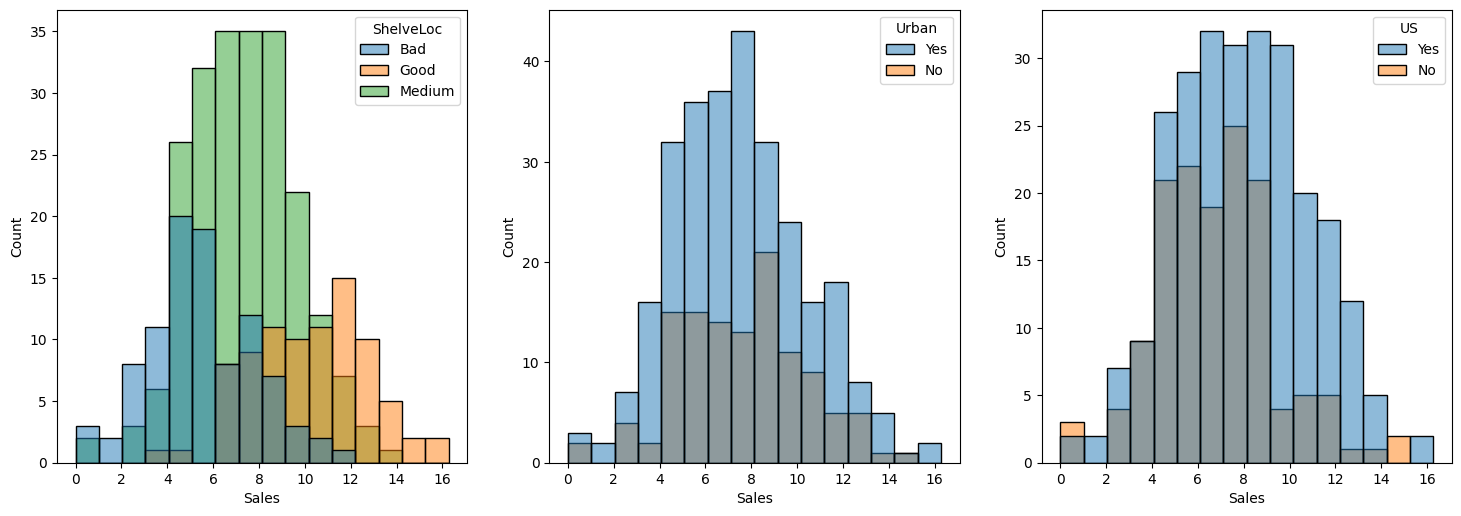

In [157]:
fig, ax = plt.subplots(1,3, figsize=(18,6))
sns.histplot(data=df, x='Sales', hue='ShelveLoc',ax=ax[0])
sns.histplot(data=df, x='Sales', hue='Urban',ax=ax[1])
sns.histplot(data=df, x='Sales', hue='US',ax=ax[2])

# Correlation Matrix

<AxesSubplot:>

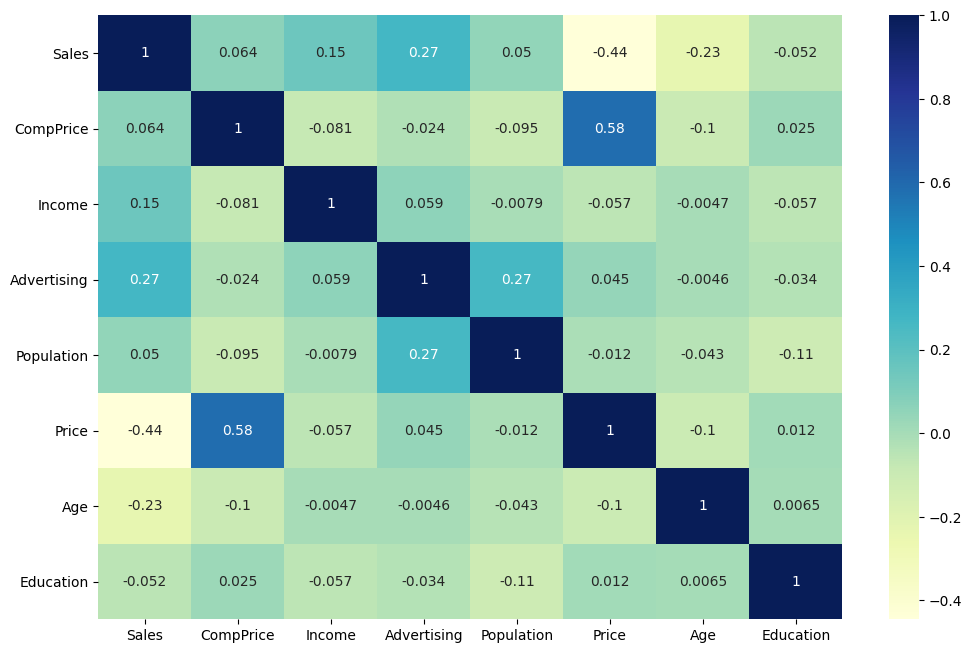

In [158]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)  

#### Correlation matrix is technique to evaluates the relationship between two variablesin the dataset
* 1: Strong relationship
* 0: Neutral relationship
* -1: Not strong relationship
* Positive numbers: Positive correlations
* Negative numbers: Negative correlations


In above matrix it shows that price and CompPrice is related +ve with 0.58, Population and Advertising is related, Sales and price is -ve co-related, Advertising and Sales are related. 

# Detect outliers using InterQuartile Range(IQR)

In [165]:
def outlier_using_IQR(df, columns='Income'):
    # q75 = df.Income.quantile(0.75)
    # q25 = df.Income.quantile(0.25)
    q25,q75 = np.percentile(a = df[columns], q=[25,75])
    
    IQR = q75-q25
    print(IQR)
    upper_limit = q75 + 1.5*IQR
    lower_limit = q25 - 1.5*IQR
    print(upper_limit, lower_limit)
    
    df_scores_filtered = df[(df[columns]>lower_limit) & (df[columns]<upper_limit)]
    return df_scores_filtered

In [166]:
df.shape

(400, 11)

As a next step, filter the dataframe to retain records that lie in the permissible range.

In [167]:
Income_outliers = outlier_using_IQR(df, columns='Income')
Income_outliers

48.25
163.375 -29.625


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [168]:
(f"As seen in the output, this method labels {len(df)-len(Income_outliers)} points as outliers, and the filtered dataframe is {len(Income_outliers)} records long.")


As seen in the output, this method labels 0 points as outliers, and the filtered dataframe is 400 records long.


In [179]:
sales_outliers = outlier_using_IQR(df, columns='Sales')
sales_outliers

3.9299999999999997
15.215 -0.504999999999999


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [180]:
print(f"As seen in the output, this method labels {len(df)-len(sales_outliers)} points as outliers, and the filtered dataframe is {len(sales_outliers)} records long.")

As seen in the output, this method labels 2 points as outliers, and the filtered dataframe is 398 records long.


In [178]:
price_outliers = outlier_using_IQR(df, columns='Price')
price_outliers

31.0
177.5 53.5


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [181]:
print(f"As seen in the output, this method labels {len(df)-len(price_outliers)} points as outliers, and the filtered dataframe is {len(price_outliers)} records long.")

As seen in the output, this method labels 5 points as outliers, and the filtered dataframe is 395 records long.


# Feature Importance

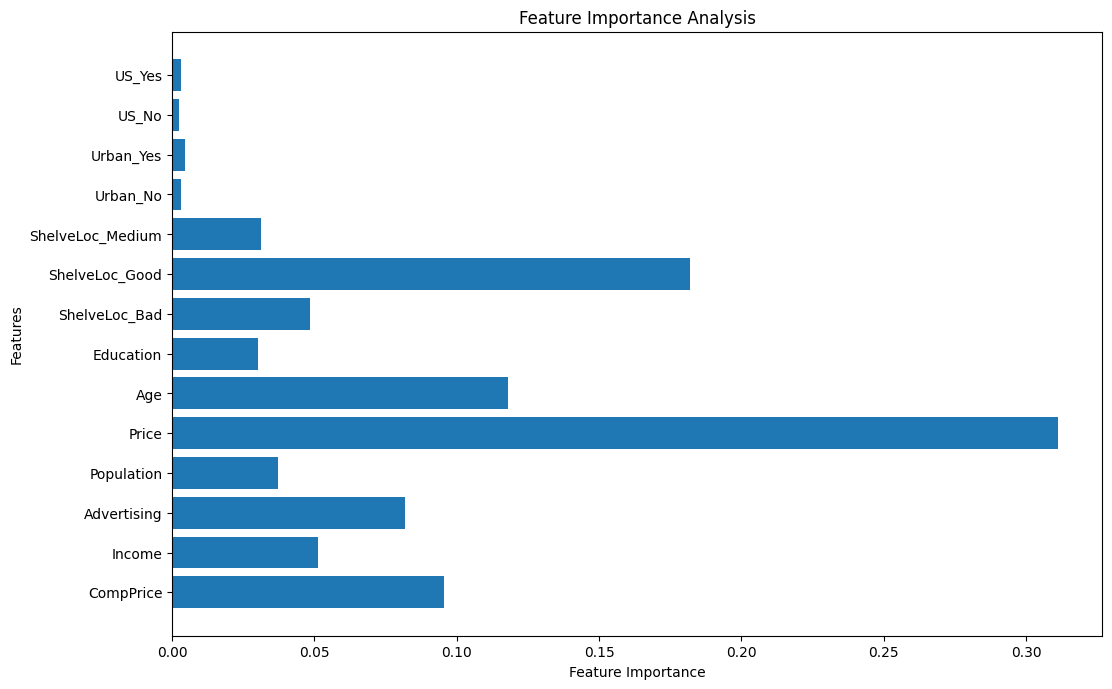

In [159]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Assuming your data is in a DataFrame named 'df'
# X contains the features, y contains the target variable (Sales)
X = df.drop('Sales', axis=1)
y = df['Sales']

# Use one-hot encoding for categorical variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a bar chart to visualize feature importances
features = X.columns
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Analysis')
plt.show()

# Import ML Modules

In [160]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [161]:

# X contains the features, y contains the target variable (Sales)
X = df.drop('Sales', axis=1)
y = df['Sales']

# Use one-hot encoding for categorical variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features (optional but can be beneficial for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
linear_reg = LinearRegression()
linear_param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

linear_grid_search = GridSearchCV(estimator=linear_reg, param_grid=linear_param_grid, scoring='neg_mean_squared_error', cv=5)
linear_grid_search.fit(X_train_scaled, y_train)

best_linear_reg = linear_grid_search.best_estimator_

# RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42)
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(estimator=rf_reg, param_grid=rf_param_grid, scoring='neg_mean_squared_error', cv=5)
rf_grid_search.fit(X_train, y_train)

best_rf_reg = rf_grid_search.best_estimator_

# XGBRegressor
xgb_reg = XGBRegressor(random_state=42)
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_grid_search = GridSearchCV(estimator=xgb_reg, param_grid=xgb_param_grid, scoring='neg_mean_squared_error', cv=5)
xgb_grid_search.fit(X_train, y_train)

best_xgb_reg = xgb_grid_search.best_estimator_

# Evaluate models on the test set
linear_reg_preds = best_linear_reg.predict(X_test_scaled)
rf_reg_preds = best_rf_reg.predict(X_test)
xgb_reg_preds = best_xgb_reg.predict(X_test)

linear_reg_mse = mean_squared_error(y_test, linear_reg_preds)
rf_reg_mse = mean_squared_error(y_test, rf_reg_preds)
xgb_reg_mse = mean_squared_error(y_test, xgb_reg_preds)

print("Linear Regression Mean Squared Error on Test Set:", linear_reg_mse)
print("Random Forest Mean Squared Error on Test Set:", rf_reg_mse)
print("XGBRegressor Mean Squared Error on Test Set:", xgb_reg_mse)

Linear Regression Mean Squared Error on Test Set: 1.0957938739816349
Random Forest Mean Squared Error on Test Set: 3.1356833015767913
XGBRegressor Mean Squared Error on Test Set: 1.9478221619836162


* A regression model tries to fit the data by drawing a line that minimizes the distance from the real data points and the point on the same line. The closer the values are to the line, the better the model behaved for that particular point. Therefore, the lower the MSE, the better.

* The MSE metric is usually compared to the mean baseline model — a regression model based on the mean. This model always predicts the average of the training data labels. If our regression model MSE is greater than our baseline MSE then there’s something wrong in our regression model.